# Forex Rate Analysis from source data ingested from Website, API & CSV
# Subhashini Natarajan

In [27]:
#Source 1 - CSV file

#Import libraries
import numpy as np
import pandas as pd
import os

#Change directory to file location
os.chdir('/Users/manikantanvenkataraman/Desktop/Data Science -College/Data Science/DSC540')
os.getcwd()

# Import csv Foreign Exchange Rates CSV file - 
forex_csv = pd.read_csv("Foreign_Exchange_Rates.csv")


# Drop the first column that was the index in the data
forex_csv.drop(forex_csv.columns[[0]], axis = 1, inplace = True)
forex_csv.head()

# Rename the column names in the dataframe
forex_csv.rename(columns={'Time Serie':'TIME_SERIES', 
                          'AUSTRALIA - AUSTRALIAN DOLLAR/US$': 'AUS_AUSD_USD',
                          'EURO AREA - EURO/US$':'EURREG_EUR_USD',
                          'NEW ZEALAND - NEW ZELAND DOLLAR/US$':'NZ_NZD_USD',
                          'UNITED KINGDOM - UNITED KINGDOM POUND/US$': 'UK_GBP_USD',
                          'BRAZIL - REAL/US$': 'BRA_BRL_USD',
                          'CANADA - CANADIAN DOLLAR/US$': 'CAN_CAD_USD',
                          'CHINA - YUAN/US$':'CHN_CNY_USD',
                          'HONG KONG - HONG KONG DOLLAR/US$': 'HKG_HKD_USD',
                          'KOREA - WON/US$': 'KOR_WON_USD',
                          'MEXICO - MEXICAN PESO/US$': 'MEX_MXN_USD',
                          'SOUTH AFRICA - RAND/US$': 'ZAF_ZAR_USD',
                          'INDIA - INDIAN RUPEE/US$': 'IND_INR_USD',
                          'SINGAPORE - SINGAPORE DOLLAR/US$': 'SGP_SGD_USD',
                          'DENMARK - DANISH KRONE/US$': 'DEN_DKK_USD', 
                          'JAPAN - YEN/US$':'JPN_YEN_USD',
                          'MALAYSIA - RINGGIT/US$':'MYS_MYR_USD',
                          'NORWAY - NORWEGIAN KRONE/US$':'NOR_NOK_USD',
                          'SWEDEN - KRONA/US$':'SWE_SEK_USD',
                          'SRI LANKA - SRI LANKAN RUPEE/US$':'LKA_LKR_USD',
                          'SWITZERLAND - FRANC/US$': 'CHE_CHF_USD',
                          'TAIWAN - NEW TAIWAN DOLLAR/US$': 'TWN_TWD_USD',
                          'THAILAND - BAHT/US$':'THA_THB_USD'
                         }, inplace = True)

# Function to obtain min/max values of the columns in the dataframe
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

forex_csv.apply(minMax) # Applies minMax function on all fields in the dataframe


# drop the records with ND

forex = forex_csv.loc[~((forex_csv['AUS_AUSD_USD']=='ND')
                        | (forex_csv['IND_INR_USD']=='ND')
                        | (forex_csv['LKA_LKR_USD']=='ND')
                        | (forex_csv['CHE_CHF_USD']=='ND')
                        | (forex_csv['TWN_TWD_USD']=='ND')
                        | (forex_csv['SGP_SGD_USD']=='ND')
                        | (forex_csv['THA_THB_USD']=='ND')
                        | (forex_csv['DEN_DKK_USD']=='ND')
                        | (forex_csv['NZ_NZD_USD']=='ND')
                        | (forex_csv['EURREG_EUR_USD']=='ND')
                        | (forex_csv['KOR_WON_USD']=='ND')
                        | (forex_csv['MEX_MXN_USD']=='ND')
                        | (forex_csv['ZAF_ZAR_USD']=='ND')
                       )
                     ]

# Verify the presence of the records with ND in the new dataframe

forex.apply(minMax) # Applies minMax function on all fields in the dataframe

# Change the data types of the columns

forex["AUS_AUSD_USD"] = forex.AUS_AUSD_USD.astype(float)
forex["EURREG_EUR_USD"] = forex.EURREG_EUR_USD.astype(float)
forex["NZ_NZD_USD"] = forex.NZ_NZD_USD.astype(float)
forex["UK_GBP_USD"]=forex.UK_GBP_USD.astype(float)
forex["BRA_BRL_USD"]=forex.BRA_BRL_USD.astype(float)
forex["CAN_CAD_USD"]=forex.CAN_CAD_USD.astype(float)
forex["CHN_CNY_USD"]=forex.CHN_CNY_USD.astype(float)
forex["HKG_HKD_USD"]=forex.HKG_HKD_USD.astype(float)
forex["IND_INR_USD"]=forex.IND_INR_USD.astype(float)
forex["SGP_SGD_USD"]=forex.SGP_SGD_USD.astype(float)
forex["DEN_DKK_USD"]=forex.DEN_DKK_USD.astype(float)
forex["JPN_YEN_USD"]=forex.JPN_YEN_USD.astype(float)
forex["MYS_MYR_USD"]=forex.MYS_MYR_USD.astype(float)
forex["NOR_NOK_USD"]=forex.NOR_NOK_USD.astype(float)
forex["SWE_SEK_USD"]=forex.SWE_SEK_USD.astype(float)
forex["LKA_LKR_USD"]=forex.LKA_LKR_USD.astype(float)
forex["CHE_CHF_USD"]=forex.CHE_CHF_USD.astype(float)
forex["TWN_TWD_USD"]=forex.TWN_TWD_USD.astype(float)
forex["KOR_WON_USD"]=forex.KOR_WON_USD.astype(float)
forex["MEX_MXN_USD"]=forex.MEX_MXN_USD.astype(float)
forex["ZAF_ZAR_USD"]=forex.ZAF_ZAR_USD.astype(float)
forex["THA_THB_USD"]=forex.THA_THB_USD.astype(float)

#Change the data type of the field from object to datetime
forex["TIME_SERIES"]=pd.to_datetime(forex.TIME_SERIES)
forex.head()


forex.apply(minMax)

forexcsv_latest = forex[forex["TIME_SERIES"]== '2019-12-31']

forexcsv_latest

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

,TIME_SERIES,AUS_AUSD_USD,EURREG_EUR_USD,NZ_NZD_USD,UK_GBP_USD,BRA_BRL_USD,CAN_CAD_USD,CHN_CNY_USD,HKG_HKD_USD,IND_INR_USD,...,SGP_SGD_USD,DEN_DKK_USD,JPN_YEN_USD,MYS_MYR_USD,NOR_NOK_USD,SWE_SEK_USD,LKA_LKR_USD,CHE_CHF_USD,TWN_TWD_USD,THA_THB_USD
5216,2019-12-31,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,71.36,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [5]:
#Source 2 - Web data

# Import libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

#Assign the website url to attribute
url = "https://www.calculator.net/currency-calculator.html"

#Open the webpage
page = urlopen(url)

#Read the webpage
html_bytes = page.read()
html = html_bytes.decode("utf-8")

# Read the url using Beautiful Soup and print to inspect the html structure
soup=BeautifulSoup(html)

# The required data is available within the tag script. 
import re
arr = soup.find_all('script')[2].get_text() #Extract the tag script
arr
start = arr.find("listsArrayData = [") + len("listsArrayData = [") # Identify the starting position
end = arr.find("];var majorCurrenciesIndex") # Identify the end position
substring = arr[start:end] # Extract the data in between
#print(substring) # Print the extracted data

# splitting using split()
delim = "],"
temp = substring.split(delim) # 
df = pd.DataFrame (temp, columns = ['col']) # Convert the data into a dataframe
#df

# Split the dataframe field into multiple fields 
delimiter= ','
ForexRate= df['col'].str.split(delimiter, expand=True)
ForexRate.columns =['Currency', 'ExchangeRate']  # Assign column headers
ForexRate

# Remove the special characters
ForexRate.Currency=ForexRate.Currency.str.replace('[','') 
ForexRate.Currency=ForexRate.Currency.str.replace('"','')
ForexRate.ExchangeRate=ForexRate.ExchangeRate.str.replace(']','')
ForexRate

#convert the datatype of ExchangeRate  into float
ForexRate.dtypes
ForexRate.ExchangeRate = ForexRate.ExchangeRate.astype(float)
ForexRate

#Split the Dataframe into countries with currency value higher than USD and lower than USD
higherThanUsd = ForexRate[ForexRate["ExchangeRate"]< 1]
lowerThanUsd= ForexRate[ForexRate["ExchangeRate"]> 1]
higherThanUsd

import os
from datetime import date

os.chdir("/Users/manikantanvenkataraman/Downloads") # Change directory
os.getcwd()

# Read an excel file with Currency code and country name
countryCurrency=pd.read_excel("list_of_currency_in_world_by_country-750j.xlsx")
countryCurrency

# Join the two dataframes
ExchangeRate = pd.merge(ForexRate, countryCurrency, how='inner', left_on = 'Currency', right_on = 'CurrencyCodeA')
ExchangeRate= ExchangeRate[['Currency', 'ExchangeRate','CountryName']]

ExchangeRate['LoadDate']=date.today()
print(ExchangeRate)




    Currency  ExchangeRate           CountryName    LoadDate
0        AED      3.673100  UNITED ARAB EMIRATES  2022-03-03
1        AED      3.673100  United Arab Emirates  2022-03-03
2        AFN     91.323541           AFGHANISTAN  2022-03-03
3        ALL    110.959497               ALBANIA  2022-03-03
4        AMD    498.676598               ARMENIA  2022-03-03
..       ...           ...                   ...         ...
233      YER    250.249937                 Yemen  2022-03-03
234      ZAR     15.280785               LESOTHO  2022-03-03
235      ZAR     15.280785               NAMIBIA  2022-03-03
236      ZAR     15.280785          SOUTH AFRICA  2022-03-03
237      ZMW     17.983725                Zambia  2022-03-03

[238 rows x 4 columns]


In [6]:
# Source 3 - API

# Import required libraries
import os
import requests
import json 
import pandas as pd

# Call the API
url='https://open.er-api.com/v6/latest/USD'
resp =requests.get('https://open.er-api.com/v6/latest/USD')

#Check the API response
print(resp.status_code)

#Store the API response in a variable
data=resp.text

# Parse the json data
parse_json=json.loads(data)


#Store the rates variable from json
forexrates_json = parse_json['rates']


# Load the json dictionary into a dataframe
forex_latest=pd.DataFrame(forexrates_json.items(), columns=['Currency', 'ExchangeRate'])



# Add a field in the dataframe to capture load date
from datetime import date
forex_latest['Date']=date.today()


forex_latest

200


,Currency,ExchangeRate,Date
0,USD,1.00,2022-03-03
1,AED,3.67,2022-03-03
2,AFN,91.09,2022-03-03
3,ALL,108.70,2022-03-03
4,AMD,487.79,2022-03-03
...,...,...,...
156,XPF,107.39,2022-03-03
157,YER,249.21,2022-03-03
158,ZAR,15.36,2022-03-03
159,ZMW,17.83,2022-03-03


In [7]:
# Load SQLlite3 and create connection

import sqlite3
cnx = sqlite3.connect(':memory:')

In [136]:
#Create table to store data from web source
cursor = cnx.cursor()
cursor.execute('drop table IF EXISTS FOREX_WEB')
ExchangeRate.to_sql(name='FOREX_WEB', con=cnx)
pd.read_sql('select * from FOREX_WEB', cnx)

,index,Currency,ExchangeRate,CountryName,LoadDate
0,0,AED,3.673100,UNITED ARAB EMIRATES,2022-03-03
1,1,AED,3.673100,United Arab Emirates,2022-03-03
2,2,AFN,91.323541,AFGHANISTAN,2022-03-03
3,3,ALL,110.959497,ALBANIA,2022-03-03
4,4,AMD,498.676598,ARMENIA,2022-03-03
...,...,...,...,...,...
233,233,YER,250.249937,Yemen,2022-03-03
234,234,ZAR,15.280785,LESOTHO,2022-03-03
235,235,ZAR,15.280785,NAMIBIA,2022-03-03
236,236,ZAR,15.280785,SOUTH AFRICA,2022-03-03


In [26]:
#Create table to store data from API
cursor.execute('drop table FOREX_API')
forex_latest.to_sql(name='FOREX_API', con=cnx)
pd.read_sql('select * from FOREX_API', cnx)

,index,Currency,ExchangeRate,Date
0,0,USD,1.00,2022-03-03
1,1,AED,3.67,2022-03-03
2,2,AFN,91.09,2022-03-03
3,3,ALL,108.70,2022-03-03
4,4,AMD,487.79,2022-03-03
...,...,...,...,...
156,156,XPF,107.39,2022-03-03
157,157,YER,249.21,2022-03-03
158,158,ZAR,15.36,2022-03-03
159,159,ZMW,17.83,2022-03-03


In [28]:
## Create table and load data from csv file
cursor.execute('drop table if exists FOREX_CSV1')
forexcsv_latest.to_sql(name='FOREX_CSV1', con=cnx)
pd.read_sql('select * from FOREX_CSV1', cnx)

,index,TIME_SERIES,AUS_AUSD_USD,EURREG_EUR_USD,NZ_NZD_USD,UK_GBP_USD,BRA_BRL_USD,CAN_CAD_USD,CHN_CNY_USD,HKG_HKD_USD,...,SGP_SGD_USD,DEN_DKK_USD,JPN_YEN_USD,MYS_MYR_USD,NOR_NOK_USD,SWE_SEK_USD,LKA_LKR_USD,CHE_CHF_USD,TWN_TWD_USD,THA_THB_USD
0,5216,2019-12-31 00:00:00,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


In [29]:
# Create a FOREX_CSV table from  FOREX_CSV1 

cursor.execute("CREATE TABLE FOREX_CSV (FOREX_DT TEXT, CURRENCY TEXT, EXCHANGERATE FLOAT)")

In [60]:
#Transpose columns into rows from csv table

cursor.execute("insert into FOREX_CSV  SELECT time_series, 'AUD', AUS_AUSD_USD FROM FOREX_CSV1")
             
cursor.execute("insert into FOREX_CSV SELECT time_series, 'EUR', EURREG_EUR_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'NZD', NZ_NZD_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'GBP', UK_GBP_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'BRL', BRA_BRL_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'CAD', CAN_CAD_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'CNY', CHN_CNY_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'HKD', HKG_HKD_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'INR', IND_INR_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'SGD', SGP_SGD_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'DKK', DEN_DKK_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'YEN', JPN_YEN_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'MYR', MYS_MYR_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'NOK', NOR_NOK_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'SEK', SWE_SEK_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'LKR', LKA_LKR_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'CHF', CHE_CHF_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'TWD', TWN_TWD_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'WON', KOR_WON_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'MXN', MEX_MXN_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'ZAR', ZAF_ZAR_USD FROM FOREX_CSV1")

cursor.execute("insert into FOREX_CSV SELECT time_series, 'THB', THA_THB_USD FROM FOREX_CSV1")

In [61]:
#Verify transposed data
pd.read_sql('select * from FOREX_CSV', cnx)

,FOREX_DT,CURRENCY,EXCHANGERATE
0,2019-12-31 00:00:00,AUD,1.4225
1,2019-12-31 00:00:00,EUR,0.8907
2,2019-12-31 00:00:00,NZD,1.4826
3,2019-12-31 00:00:00,GBP,0.7536
4,2019-12-31 00:00:00,BRL,4.0190
5,2019-12-31 00:00:00,CAD,1.2962
6,2019-12-31 00:00:00,CNY,6.9618
7,2019-12-31 00:00:00,HKD,7.7894
8,2019-12-31 00:00:00,INR,71.3600
9,2019-12-31 00:00:00,SGD,1.3446


In [72]:
# Create table to store merged data from the three sources
cursor.execute("DROP TABLE IF EXISTS FOREX_ANALYSIS")
cursor.execute("CREATE TABLE FOREX_ANALYSIS (COUNTRY TEXT, CURRENCY TEXT, EXCHANGERATE_CSV FLOAT, DATE_CSV TEXT, EXCHANGERATE_WEB FLOAT, DATE_WEB DATE, EXCHANGERATE_API FLOAT, DATE_API DATE)")

In [73]:
# Join the three tables to create the final table
cursor.execute("insert into FOREX_ANALYSIS SELECT DISTINCT  B.CountryName, B.CURRENCY	, A.EXCHANGERATE, A.FOREX_DT , B.ExchangeRate, B.LoadDate,  C.ExchangeRate, C.Date	 FROM FOREX_CSV A JOIN  FOREX_WEB B ON A.CURRENCY= B.CURRENCY JOIN FOREX_API C ON A.CURRENCY = C.CURRENCY")

In [74]:
# Select merged dataset
pd.read_sql('select * from FOREX_ANALYSIS', cnx)

,COUNTRY,CURRENCY,EXCHANGERATE_CSV,DATE_CSV,EXCHANGERATE_WEB,DATE_WEB,EXCHANGERATE_API,DATE_API
0,AUSTRALIA,AUD,1.4225,2019-12-31 00:00:00,1.368771,2022-03-03,1.37,2022-03-03
1,CHRISTMAS ISLAND,AUD,1.4225,2019-12-31 00:00:00,1.368771,2022-03-03,1.37,2022-03-03
2,COCOS (KEELING) ISLANDS,AUD,1.4225,2019-12-31 00:00:00,1.368771,2022-03-03,1.37,2022-03-03
3,HEARD ISLAND AND MCDONALD ISLANDS,AUD,1.4225,2019-12-31 00:00:00,1.368771,2022-03-03,1.37,2022-03-03
4,KIRIBATI,AUD,1.4225,2019-12-31 00:00:00,1.368771,2022-03-03,1.37,2022-03-03
...,...,...,...,...,...,...,...,...
59,MEXICO,MXN,18.8600,2019-12-31 00:00:00,20.748906,2022-03-03,20.66,2022-03-03
60,LESOTHO,ZAR,13.9730,2019-12-31 00:00:00,15.280785,2022-03-03,15.36,2022-03-03
61,NAMIBIA,ZAR,13.9730,2019-12-31 00:00:00,15.280785,2022-03-03,15.36,2022-03-03
62,SOUTH AFRICA,ZAR,13.9730,2019-12-31 00:00:00,15.280785,2022-03-03,15.36,2022-03-03


In [81]:
# Read data from database table and store them in lists
cursor.execute('SELECT * FROM FOREX_ANALYSIS')
data =cursor.fetchall()

country=[]
currency=[]
exchangerate_csv=[]
date_csv=[]
exchangerate_web=[]
date_web=[]
exchangerate_api=[]
date_api=[]

for row in data:
        country.append(row[0]) # Store country data
        currency.append(row[1]) # Store currency data
        exchangerate_csv.append(row[2]) # Store exchangerate data from csv
        date_csv.append((row[3])) # Store date from csv
        exchangerate_web.append(row[4]) # Store exchangerate data from web
        date_web.append(row[5]) #Store web date 
        exchangerate_api.append(row[6]) # Store exchangerate data from API
        date_api.append(row[7]) #Store API date

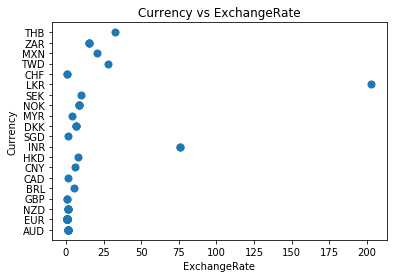

In [106]:
# Data visualization - 1
# Scatterplot
import matplotlib.pyplot as plt
plt.scatter(exchangerate_web, currency, s=50)
plt.xlabel('ExchangeRate')
plt.ylabel('Currency')
plt.title('Currency vs ExchangeRate')
plt.show()

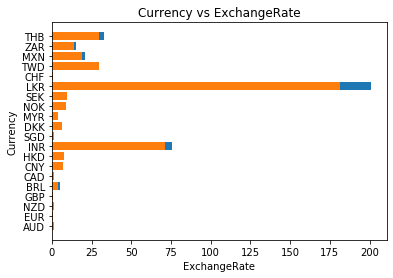

In [107]:
# Data visualization - 2
# Bar chart
plt.barh(currency, exchangerate_api )
plt.barh(currency,exchangerate_csv )
plt.xlabel('ExchangeRate')
plt.ylabel('Currency')
plt.title('Currency vs ExchangeRate')
plt.show()

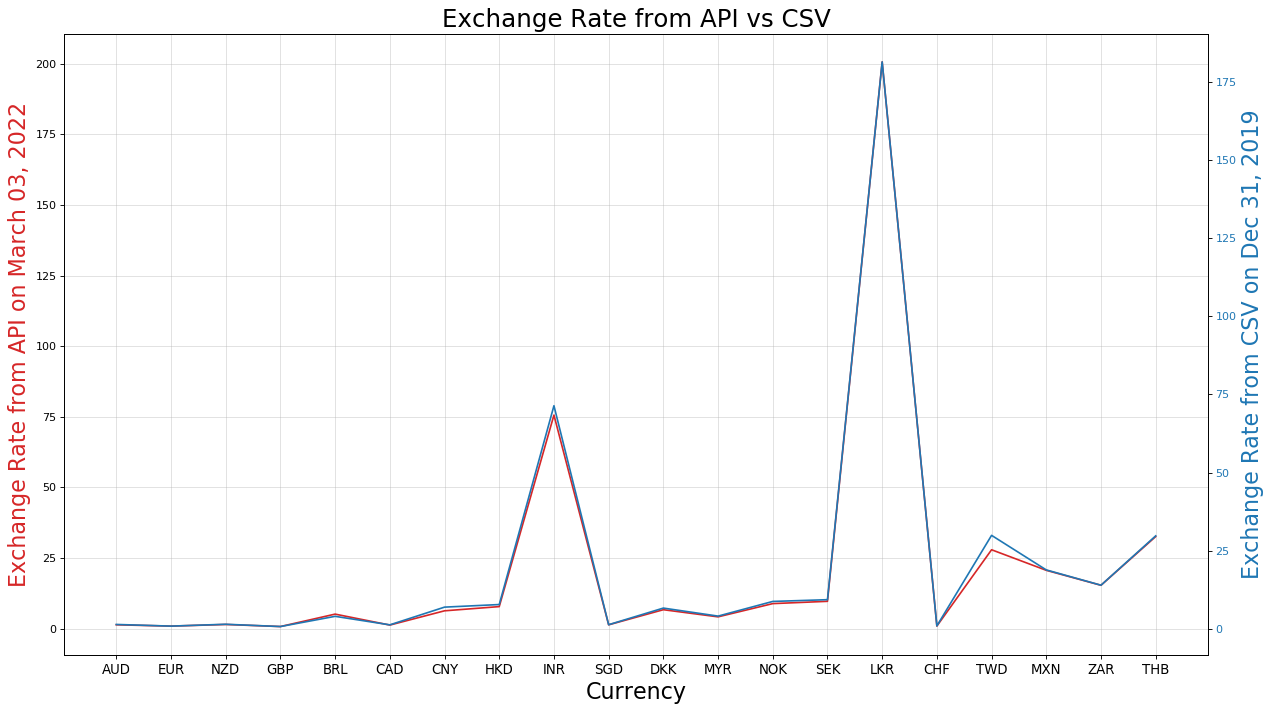

In [104]:
# Data visualization - 3
# Plot with secondary y-axis
x = currency
y1 = exchangerate_api
y2 = exchangerate_csv

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# ax1 (left Y axis)
ax1.set_xlabel('Currency', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Exchange Rate from API on March 03, 2022', color='tab:red', fontsize=20)
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel('Exchange Rate from CSV on Dec 31, 2019', color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title("Exchange Rate from API vs CSV", fontsize=22)
fig.tight_layout()
plt.show()

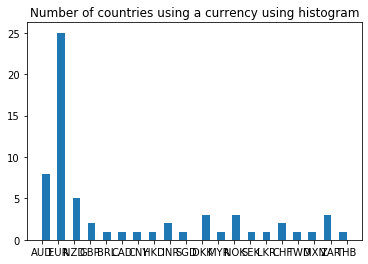

In [135]:
# Data visualization - 4
# Plot histogram on currency
fig, ax = plt.subplots()
ax.hist(x, bins=40, rwidth=50)
plt.xlabel='Currency'
plt.ylabel='Number of countries'
plt.title('Number of countries using a currency using histogram')
plt.show()

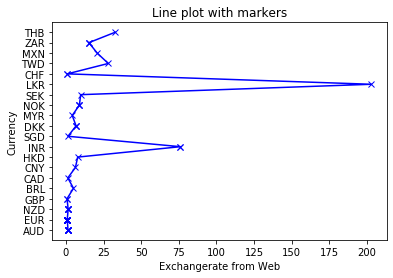

In [121]:
# Data visualization - 5
#Line plot with markers
plt.plot(y, x, 'b', marker = 'x')
plt.xlabel('Exchangerate from Web')
plt.ylabel('Currency')
plt.title('Line plot with markers')
plt.show()